In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing
import sklearn.feature_extraction

%matplotlib inline

import matplotlib.pyplot as plt
from pprint import pformat
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('cars_norm_sorted.csv')
df.head()

,Unnamed: 0,name,price,abtest,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated
0,0,Golf_3_1.6,480,test,limousine,1993,0,golf,150000,0,benzin,volkswagen,2016-03-24
1,3,GOLF_4_1_4__3TпїЅRER,1500,test,kleinwagen,2001,75,golf,150000,6,benzin,volkswagen,2016-03-17
2,5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,102,3er,150000,10,benzin,bmw,2016-04-04
3,6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,109,2_reihe,150000,8,benzin,peugeot,2016-04-01
4,9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,test,kleinwagen,1998,101,golf,150000,0,benzin,volkswagen,2016-03-17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116875 entries, 0 to 116874
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           116875 non-null  int64 
 1   name                 116875 non-null  object
 2   price                116875 non-null  int64 
 3   abtest               116875 non-null  object
 4   vehicleType          116875 non-null  object
 5   yearOfRegistration   116875 non-null  int64 
 6   powerPS              116875 non-null  int64 
 7   model                116875 non-null  object
 8   kilometer            116875 non-null  int64 
 9   monthOfRegistration  116875 non-null  int64 
 10  fuelType             116875 non-null  object
 11  brand                116875 non-null  object
 12  dateCreated          116875 non-null  object
dtypes: int64(6), object(7)
memory usage: 11.6+ MB


In [5]:
df.dtypes

Unnamed: 0              int64
name                   object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
dateCreated            object
dtype: object

In [6]:
categorial_column = [col for col in df.columns if df[col].dtype == 'object']
not_categorial_column = [col for col in df.columns if df[col].dtype != 'object']
categorial_column

['name', 'abtest', 'vehicleType', 'model', 'fuelType', 'brand', 'dateCreated']

In [7]:
df.corr()

,Unnamed: 0,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
Unnamed: 0,1.000000,0.001617,0.000443,0.004220,0.000180,-0.002936
price,0.001617,1.000000,0.387716,0.485932,-0.138619,0.108067
yearOfRegistration,0.000443,0.387716,1.000000,0.053802,-0.106562,-0.000845
powerPS,0.004220,0.485932,0.053802,1.000000,0.050587,0.122261
kilometer,0.000180,-0.138619,-0.106562,0.050587,1.000000,-0.021228
monthOfRegistration,-0.002936,0.108067,-0.000845,0.122261,-0.021228,1.000000


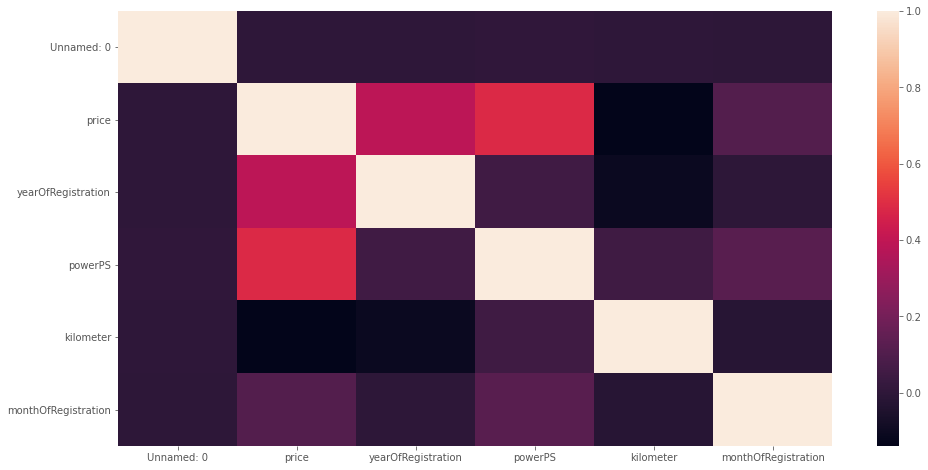

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.heatmap(df.corr(), ax = ax)

# Видно, что между всеми числовыми признаками нет полной корреляции, то есть в дальнейшем всех их оставляем

In [9]:
df.head()

,Unnamed: 0,name,price,abtest,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated
0,0,Golf_3_1.6,480,test,limousine,1993,0,golf,150000,0,benzin,volkswagen,2016-03-24
1,3,GOLF_4_1_4__3TпїЅRER,1500,test,kleinwagen,2001,75,golf,150000,6,benzin,volkswagen,2016-03-17
2,5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,102,3er,150000,10,benzin,bmw,2016-04-04
3,6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,109,2_reihe,150000,8,benzin,peugeot,2016-04-01
4,9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,test,kleinwagen,1998,101,golf,150000,0,benzin,volkswagen,2016-03-17


In [10]:
df.shape

(116875, 13)

In [11]:
for col in categorial_column:
    print('Признак: {}, кол-во уникальных значений: {}'.format(col, df[col].nunique()))
    print('Уникальные значения: ')
    print(df[col].value_counts(), '\n')

Признак: name, кол-во уникальных значений: 80390
Уникальные значения: 
Volkswagen_Golf_1.4                                   259
BMW_316i                                              255
BMW_318i                                              252
Opel_Corsa                                            228
Ford_Fiesta                                           212
                                                     ... 
VW_Polo_6N_ohne_TпїЅV                                   1
Mazda_323_F_1.5_Tuev_6/16_Klima_elekt.Fensterheber      1
Renault_Twingo__Liberty__gruene_Plakette                1
Opel_Zafira_2.2_Njoy_mit_Style_Paket                    1
Opel_Astra_1.6__Klima_Scheckheft_1._Hand_Tuev_neu       1
Name: name, Length: 80390, dtype: int64 

Признак: abtest, кол-во уникальных значений: 2
Уникальные значения: 
test       60607
control    56268
Name: abtest, dtype: int64 

Признак: vehicleType, кол-во уникальных значений: 8
Уникальные значения: 
limousine     43064
kleinwagen    24770
kom

In [12]:
df['abtest'] = df['abtest'].map({'test': 1, 'control': 0})
df.drop(['yearOfRegistration', 'monthOfRegistration'], axis = 1, inplace = True)
df

,Unnamed: 0,name,price,abtest,vehicleType,powerPS,model,kilometer,fuelType,brand,dateCreated
0,0,Golf_3_1.6,480,1,limousine,0,golf,150000,benzin,volkswagen,2016-03-24
1,3,GOLF_4_1_4__3TпїЅRER,1500,1,kleinwagen,75,golf,150000,benzin,volkswagen,2016-03-17
2,5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,1,limousine,102,3er,150000,benzin,bmw,2016-04-04
3,6,Peugeot_206_CC_110_Platinum,2200,1,cabrio,109,2_reihe,150000,benzin,peugeot,2016-04-01
4,9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,1,kleinwagen,101,golf,150000,benzin,volkswagen,2016-03-17
...,...,...,...,...,...,...,...,...,...,...,...
116870,175825,SMART_450_COUPE_TOP_ZUSTAND,2100,0,kleinwagen,61,fortwo,125000,benzin,smart,2016-04-04
116871,175827,Mercedes_Benz_C_320,3300,0,limousine,218,c_klasse,150000,benzin,mercedes_benz,2016-03-10
116872,175828,MERCEDES_C180_TпїЅV_01.2018,2800,1,limousine,143,c_klasse,150000,benzin,mercedes_benz,2016-03-10
116873,175830,Volkswagen_Transporter_T4_TDi_2_5_fahrbereit,999,1,bus,88,transporter,150000,diesel,volkswagen,2016-03-11


In [13]:
from sklearn.preprocessing import LabelBinarizer

In [14]:
ohe_columns = []
for col in categorial_column:
    if df[col].nunique() > 2 and df[col].nunique() <= 1000:
        one_hot = LabelBinarizer() # один из методов one_hot_encoding
        encoding = pd.DataFrame(one_hot.fit_transform(df[col].values.reshape(-1, 1)))
        df = pd.concat([encoding, df], axis = 1)
        df.drop(col, axis = 1, inplace = True)
df

,0,1,2,3,4,5,6,7,8,9,...,4,5,6,7,Unnamed: 0,name,price,abtest,powerPS,kilometer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,Golf_3_1.6,480,1,0,150000
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,3,GOLF_4_1_4__3TпїЅRER,1500,1,75,150000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,1,102,150000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,Peugeot_206_CC_110_Platinum,2200,1,109,150000
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,1,101,150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116870,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,175825,SMART_450_COUPE_TOP_ZUSTAND,2100,0,61,125000
116871,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,175827,Mercedes_Benz_C_320,3300,0,218,150000
116872,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,175828,MERCEDES_C180_TпїЅV_01.2018,2800,1,143,150000
116873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,175830,Volkswagen_Transporter_T4_TDi_2_5_fahrbereit,999,1,88,150000


In [16]:
df.drop('name', axis = 1, inplace = True)
df

,0,1,2,3,4,5,6,7,8,9,...,3,4,5,6,7,Unnamed: 0,price,abtest,powerPS,kilometer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,480,1,0,150000
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,3,1500,1,75,150000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,5,650,1,102,150000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6,2200,1,109,150000
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,9,999,1,101,150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116870,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,175825,2100,0,61,125000
116871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,175827,3300,0,218,150000
116872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,175828,2800,1,143,150000
116873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,175830,999,1,88,150000


# Накоец все категориальные признаки были закодированы и можно приступить к обучению

In [17]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,0,1,2,3,4,5,6,7,8,9,...,2,3,4,5,6,7,price,abtest,powerPS,kilometer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,480,1,0,150000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1500,1,75,150000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,650,1,102,150000
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2200,1,109,150000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,999,1,101,150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116870,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2100,0,61,125000
116871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3300,0,218,150000
116872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2800,1,143,150000
116873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,999,1,88,150000


In [18]:
from sklearn import preprocessing
# приведем всё к одной шкале
min_max_scaler=preprocessing.MinMaxScaler()

for col in ['price', 'abtest', 'powerPS', 'kilometer']:
    df[col] = min_max_scaler.fit_transform(np.array(df[col]).reshape(-1, 1))
df

,0,1,2,3,4,5,6,7,8,9,...,2,3,4,5,6,7,price,abtest,powerPS,kilometer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.036154,1.0,0.000000,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.113141,1.0,0.303644,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.048985,1.0,0.412955,1.0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0.165975,1.0,0.441296,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.075326,1.0,0.408907,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116870,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.158427,0.0,0.246964,0.0
116871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.249000,0.0,0.882591,1.0
116872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.211261,1.0,0.578947,1.0
116873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.075326,1.0,0.356275,1.0


In [19]:
featers = df.drop('price',axis=1)
target = df['price']

In [20]:
# Разбиваем на тестовую и контрольную выборки
from sklearn.model_selection import train_test_split
X_train, X_holdout, y_train, y_holdout = train_test_split(featers.values, target, test_size=0.3, random_state=17)

In [21]:
X_train.shape, y_train.shape

((81812, 381), (81812,))

In [22]:
X_holdout.shape, y_holdout.shape

((35063, 381), (35063,))

# Линейная 

In [23]:
model_liner = LinearRegression()
model_liner.fit(X_train, y_train)
print("Качество обучения на тренировочных данных R^2 = {}".format(model_liner.score(X_train, y_train)))

liner_pred = model_liner.predict(X_holdout)
print("RMSE = {}".format(mean_squared_error(y_holdout, liner_pred, squared = False)))

Качество обучения на тренировочных данных R^2 = 0.4984633571741047
RMSE = 8716932222.972996


# KNN 

In [ ]:
np.mean(cross_val_score(KNeighborsRegressor(n_neighbors=1), X_train, y_train, cv=5))

In [ ]:
model_knn = KNeighborsRegressor(n_neighbors=10) #Задаем количество соседий на угад
knn_params = {'n_neighbors': list(range(1, 10)) + list(range(20, 31))}
model_knn_grid = GridSearchCV(model_knn, knn_params,
                              cv = 5,
                              n_jobs = -1, 
                              verbose = False)
model_knn_grid.fit(X_train, y_train)
knn_pred = model_knn_grid.predict(X_holdout)

print("Лучшее качество обучение = {}".format(model_knn_grid.best_score_))
print("Оптимальное количество соседей = {}".format(model_knn_grid.best_params_))
print("Качество обучения на тренировочных данных R^2 = {}".format(model_knn_grid.score(X_train, y_train)))
print("RMSE = {}".format(mean_squared_error(y_holdout, knn_pred, squared = False)))

# DT

In [ ]:
np.mean(cross_val_score(DecisionTreeRegressor(max_depth=5, random_state=17), X_train, y_train, cv=5))

In [ ]:
model_tree = DecisionTreeRegressor(max_depth=15, random_state=17) #Задаем количество соседий на угад
tree_params = {'max_depth': np.arange(1, 15), 
               'max_features': range(1, X_train.shape[1]+1)}

model_tree_grid = GridSearchCV(model_tree, tree_params,
                              cv = 5,
                              n_jobs = -1, 
                              verbose = True)

model_tree_grid.fit(X_train, y_train)
tree_pred = model_tree_grid.predict(X_holdout)

print("Лучшее качество обучение = {}".format(model_tree_grid.best_score_))
print("Оптимальное количество соседей = {}".format(model_tree_grid.best_params_))
print("Качество обучения на тренировочных данных R^2 = {}".format(model_tree_grid.score(X_train, y_train)))
print("RMSE = {}".format(mean_squared_error(y_holdout, tree_pred, squared = False)))

# Я очень долго ждал, но так и не дождался(((